<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2023-24

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 11th JANUARY @ 14:00**. 

In [1]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

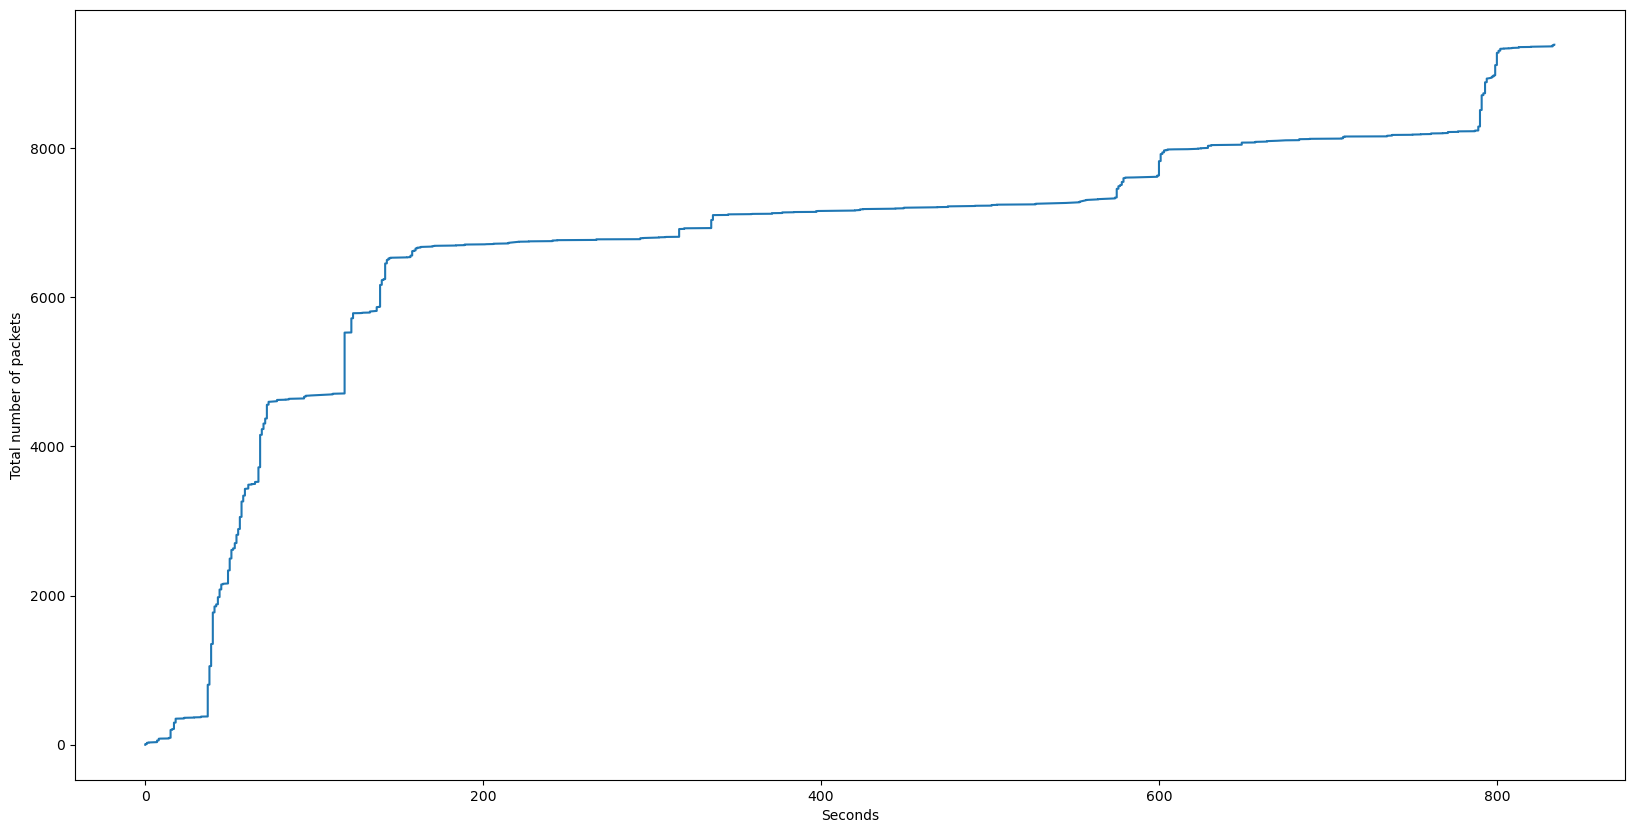

In [2]:
# ANSWER
plt.figure(figsize=(20,10))
######### ADD YOUR CODE HERE ##########
x = np.array(data['Time'].round(0))
y = np.array(data.index)

plt.xlabel("Seconds")
plt.ylabel("Total number of packets")
plt.plot(x,y)
plt.show()

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

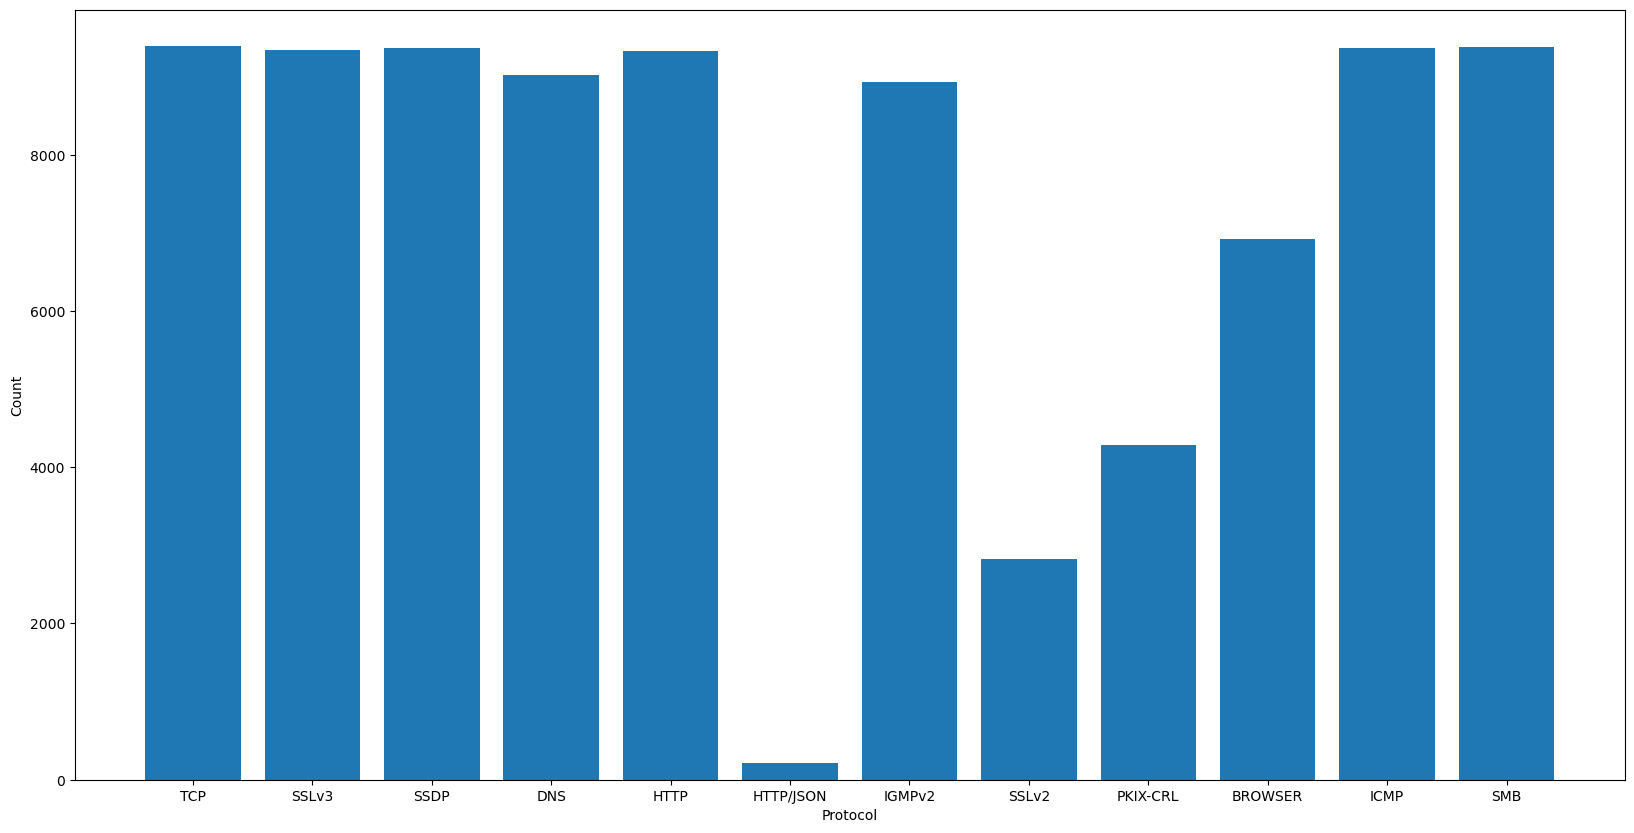

In [3]:
# ANSWER
######### ADD YOUR CODE HERE ##########
plt.figure(figsize=(20,10))
x = np.array(data['Protocol'])
y = np.array(data.index)
plt.xlabel("Protocol")
plt.ylabel('Count')
plt.bar(x, y)
plt.show()

### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

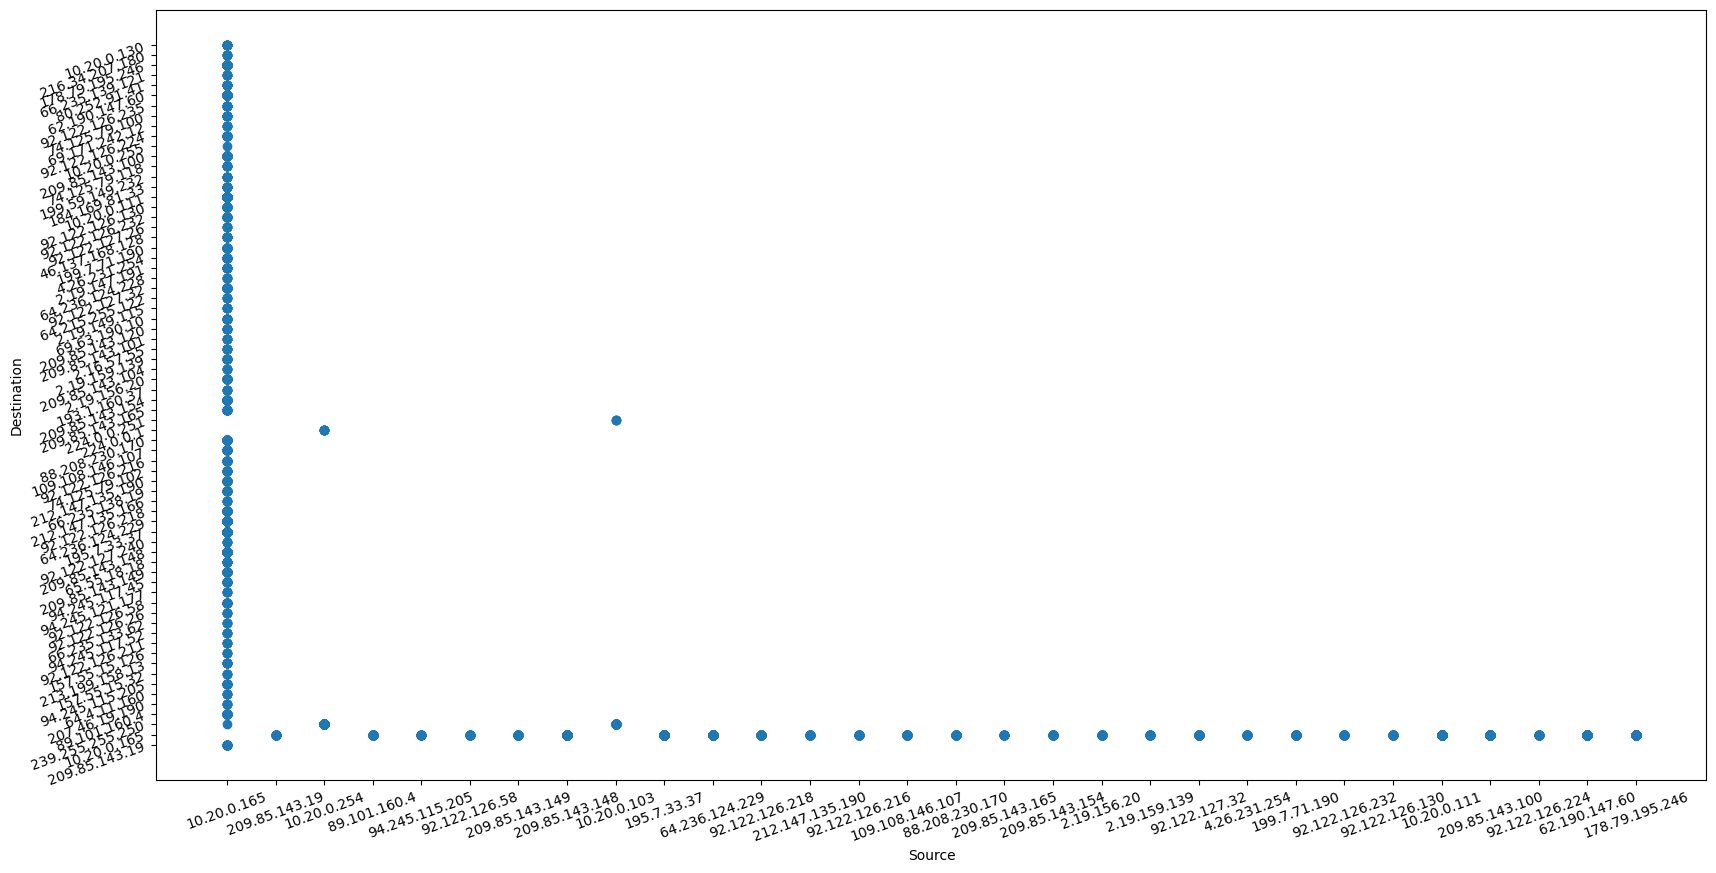

In [4]:
# ANSWER
plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
######### ADD YOUR CODE HERE ##########
x = np.array(data['Source'])
y = np.array(data['Destination'])
plt.xlabel('Source')
plt.ylabel('Destination')
plt.scatter(x,y)
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

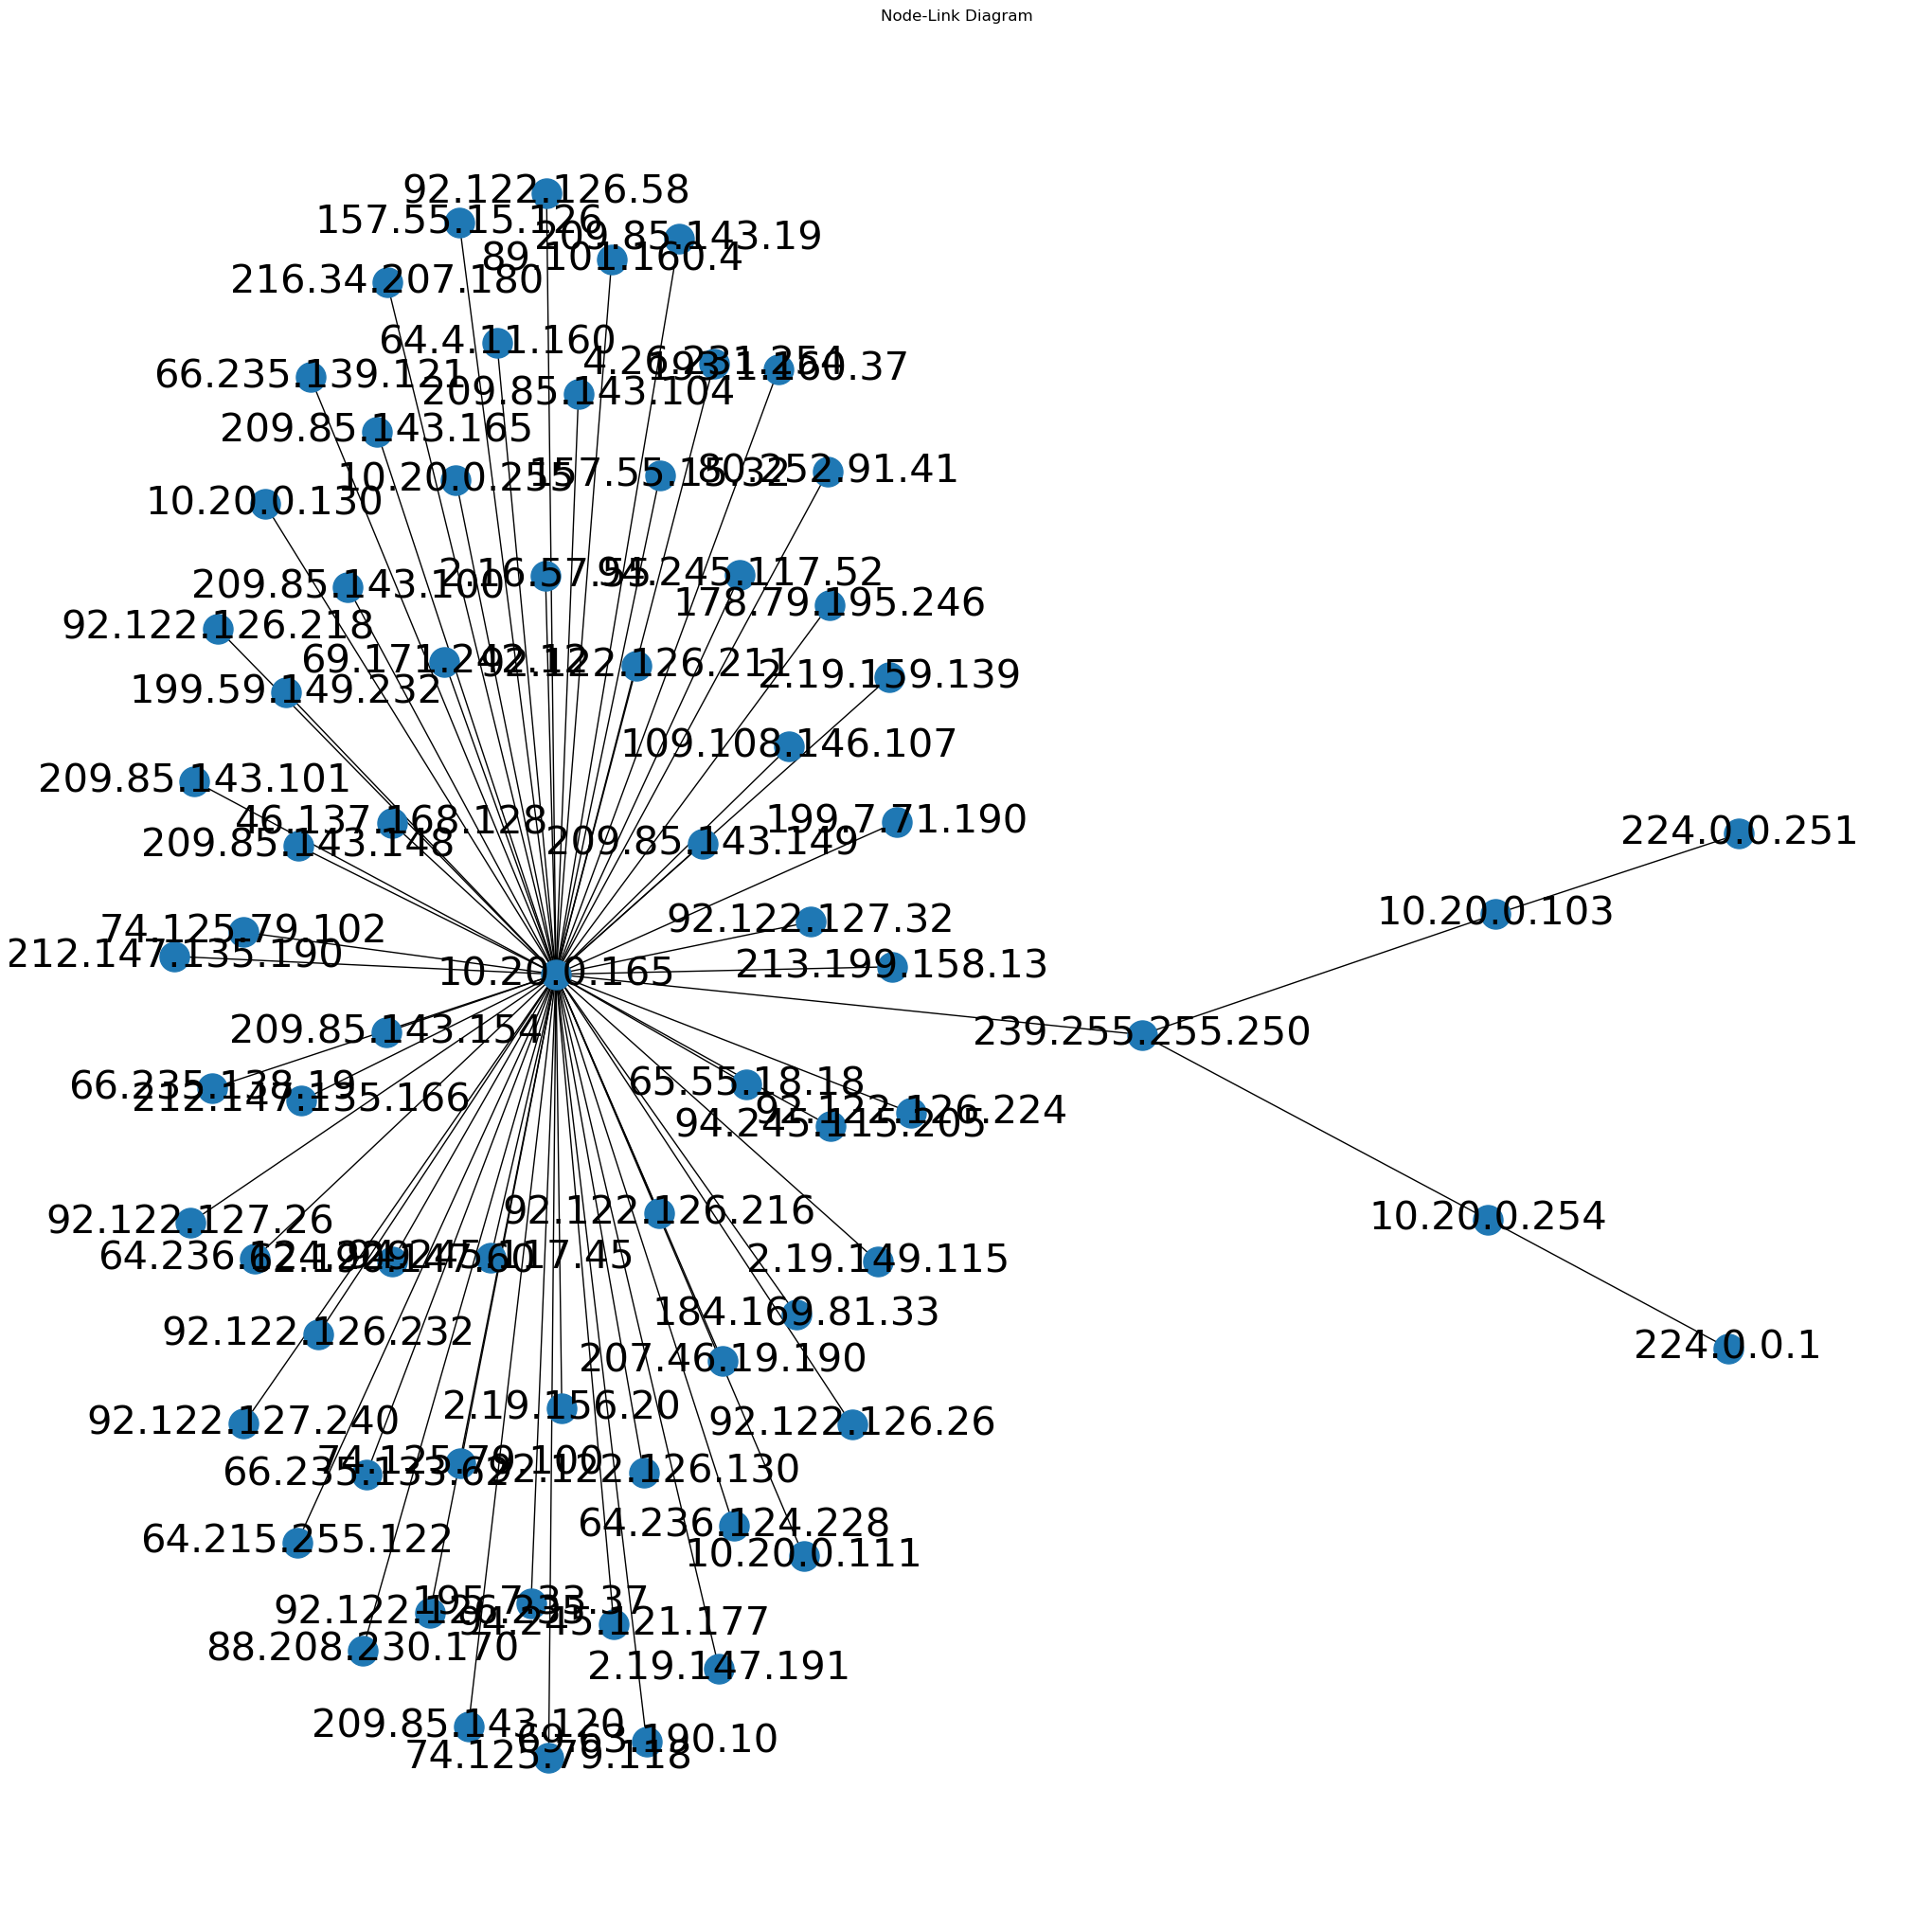

In [3]:
# ANSWER
######### ADD YOUR CODE HERE ##########
import networkx as nx
plt.figure(figsize=(20,20))
G = nx.from_pandas_edgelist(data, 'Source', 'Destination')
x = nx.spring_layout(G)
nx.draw(G,x, with_labels=True,node_size=500, font_size=30)
plt.title("Node-Link Diagram")
plt.show()


### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [6]:
######### ADD YOUR CODE HERE ##########
uni_proValue = data['Protocol'].unique()

for p in uni_proValue:
    data[p] = data['Protocol'] == p
data

,Time,Source,Destination,Protocol,Length,Info,TCP,SSLv3,SSDP,DNS,HTTP,HTTP/JSON,IGMPv2,SSLv2,PKIX-CRL,BROWSER,ICMP,SMB
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,True,False,False,False,False,False,False,False,False,False,False,False
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",True,False,False,False,False,False,False,False,False,False,False,False
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,True,False,False,False,False,False,False,False,False,False,False,False
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,False,True,False,False,False,False,False,False,False,False,False,False
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID...",False,False,False,False,False,False,False,False,False,False,False,True
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:",False,False,False,False,False,False,False,False,False,False,False,True
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra...",False,False,False,False,False,False,False,False,False,False,False,True
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA...",False,False,False,False,False,False,False,False,False,False,False,True


### Question 6: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol. 

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

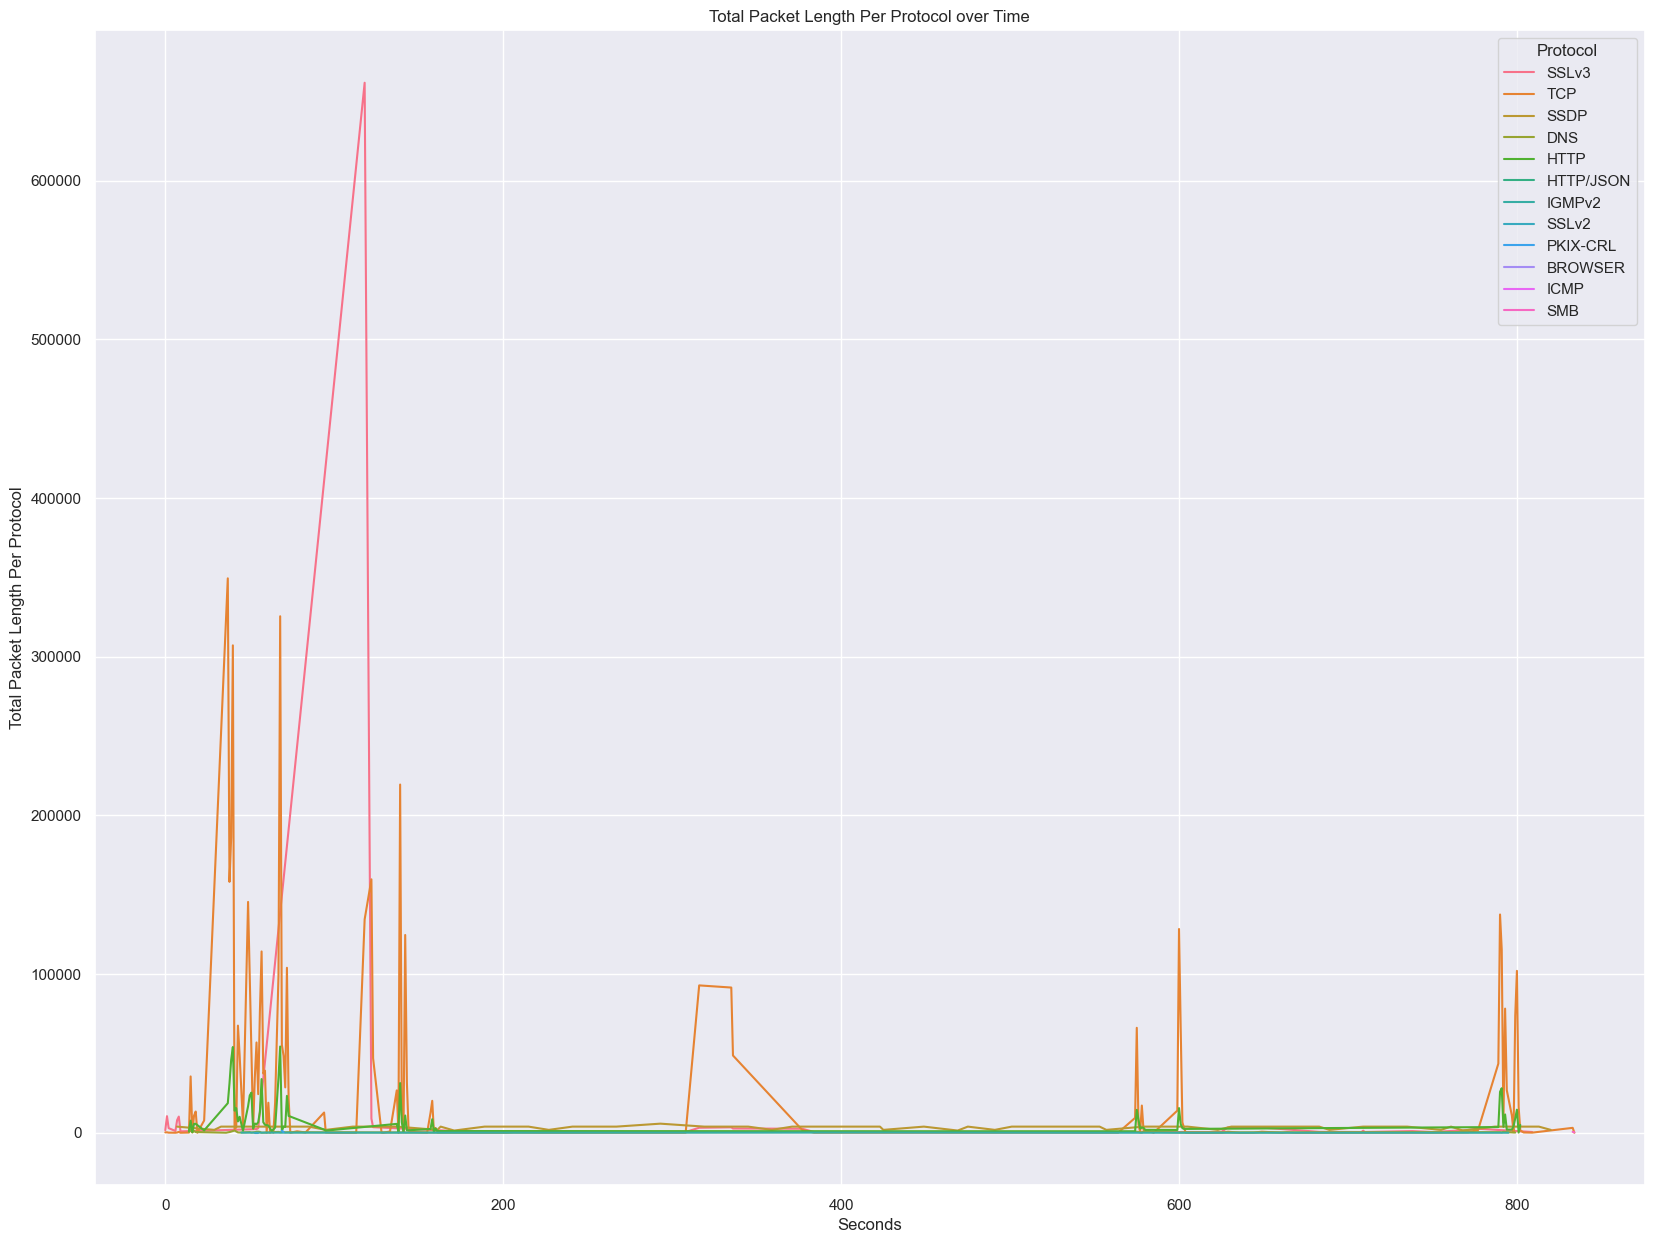

In [8]:
# ANSWER
######### ADD YOUR CODE HERE ##########
import seaborn as sns
plt.figure(figsize=(20,15))



time = data['Time'].round(0)
data = data.groupby([time, 'Protocol'])['Length'].sum()
data = data.reset_index()

sns.set(style="darkgrid")
sns.lineplot(x = time, y = data['Length'], hue = data['Protocol'], data = data['Protocol'])
plt.xlabel('Seconds')
plt.ylabel('Total Packet Length Per Protocol')
plt.title('Total Packet Length Per Protocol over Time')
plt.show()

### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

The key findings and visualisations provide insightful information about the behaviour of the network. As can be observed in the line chart, an increasing trend in the total number of packets over time points to an increase in network activity. This could represent a positive trend due to consistent user interactions or well-established network patterns. Anomalies in the scatter chart, such as isolated source-destination pairs and low HTTPS/JSON usage, may cause concern, though. Given their prevalence in web-related traffic, low HTTPS/JSON usage may be a sign of strange network activity. The node-link diagram's hierarchical network structure suggests a potentially intricate network architecture. Analysing network architecture and possible trends in network hierarchy requires an understanding of this structure. The multi-line chart is significant because it shows a spike in SSLv3 traffic followed by a decline. This might be considered as an anomaly, possibly signifying a major network event or security threats. This observation calls for additional research.
proactive monitoring and response must be emphasised. Security teams should keep an eye on network behaviour to spot any alterations from the norm and look into anomalies promptly. To effectively handle possible threats, it's critical to keep incident response plans and security measures updated.